In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import math
%matplotlib inline

In [2]:
import os
os.chdir("C:/Users/Sagar Ghiya/Desktop")

In [3]:
data = sio.loadmat('dataset')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X_test', 'X_train', 'X_validation', 'Y_test', 'Y_train', 'Y_validation'])

In [5]:
x_train = data['X_train']
x_test = data['X_test']
x_validation = data['X_validation']
y_train = data['Y_train']
y_test = data['Y_test']
y_validation = data['Y_validation']

In [6]:
x_train.shape

(2, 200)

In [7]:
y_train.shape

(1, 200)

In [8]:
x_validation.shape

(2, 80)

In [9]:
y_validation.shape

(1, 80)

In [10]:
x_test.shape

(2, 120)

In [11]:
y_test.shape

(1, 120)

In [12]:
#Q1
# S1 = 2 ; S3 = 1
# Because there are 2 features and 1 output.

In [13]:
np.random.seed(123)

In [14]:
#Hyperbolic tan function
def tanh(x):
    return np.tanh(x)



In [15]:
#Sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [16]:
# Relu activation function
def relu(X):
    return np.maximum(0,X)

In [17]:
#Initializing parameters randomly
def init_param():
    W1 = np.random.randn(hid_l, in_l) * 0.01
    b1 = np.zeros((hid_l, 1))
    W2 = np.random.randn(out_l, hid_l) * 0.01;
    b2 = np.zeros((out_l, 1))
    assert (W1.shape == (hid_l, in_l))
    assert (b1.shape == (hid_l, 1))
    assert (W2.shape == (out_l, hid_l))
    assert (b2.shape == (out_l, 1))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

In [18]:
#Function for prediction
def predict(X,param):
    fwd = fwd_prop(X, param)
    return np.around(fwd['A2'])

In [19]:
#Forward Propogation
def fwd_prop(X, param):
    W1 = param['W1']
    b1 = param['b1']
    W2 = param['W2']
    b2 = param['b2']
    a1 = sigmoid(np.dot(W1, X)+b1)
    z1 = np.dot(W1, X)+b1
    a2 = sigmoid(np.dot(W2, a1)+b2)
    z2 = np.dot(W2, a1)+b2
    val = {'A1':a1,'Z1':z1,'A2':a2,'Z2':z2}
    return val

In [20]:
#Backward Propogation
def back_prop(X, Y, param, val, lambd_reg):
    W1 = param['W1']
    b1 = param['b1']
    W2 = param['W2']
    b2 = param['b2']

    A1 = val['A1']
    Z1 = val['Z1']
    A2 = val['A2']

    m = Y.shape[1]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m + lambd_reg * W2
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m + lambd_reg * W1
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    W1 -= dW1
    b1 -= db1
    W2 -= dW2
    b2 -= db2
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

In [21]:
#Classification error
def error(predictor,actual):
    err=0
    len=predictor.shape[1]
    for i in range(len):
        if predictor[0,i]!=actual[0,i]:
            err+=1
    return err/len

In [22]:
#Model for NN
def build_model():
    param = init_param()
    for i in range(iterations):
            val = fwd_prop(x_train, param)
            A2 = val['A2']
            param = back_prop(x_train,y_train,param,val,lambd_reg)
    return(param)

In [23]:
#Initializing values
rho = 0.001
in_l=2
out_l=1
hid_l=2
iterations= 10000
lambd_reg=0.5

In [24]:
#Q2
train = build_model()

In [25]:
train

{'W1': array([[ -7.36931210e-20,   1.72508955e-19],
        [ -1.22822796e-20,   2.87517095e-20]]),
 'W2': array([[ -2.66453526e-17,  -4.44089210e-18]]),
 'b1': array([[  5.77186322e-06],
        [ -1.68745115e-05]]),
 'b2': array([[ -2.84283762e-16]])}

In [26]:
preres =predict(x_validation,train)
error(preres,y_validation)

0.5

In [27]:
lambd_reg = 0.05
train1 = build_model()
preres1 =predict(x_validation,train1)
error(preres1,y_validation)

0.5

In [28]:
lambd_reg = 0.005
train5 = build_model()
preres5 =predict(x_validation,train5)
error(preres5,y_validation)

0.5

In [29]:
lambd_reg = 0.0005
train3 = build_model()
preres3 =predict(x_validation,train3)
error(preres3,y_validation)

0.0625

In [30]:
lambd_reg = 0.00005
train4 = build_model()
preres4 =predict(x_validation,train4)
error(preres4,y_validation)

0.0375

In [31]:
lambd_reg = 0.000005
train5 = build_model()
preres5 =predict(x_validation,train5)
error(preres5,y_validation)

0.075

In [32]:
lambd_reg = 0.00005


In [33]:
pretrain = predict(x_train,train4)
error(pretrain,y_train)

0.07

In [34]:
pretest = predict(x_test,train4)
error(pretest,y_test)

0.06666666666666667

In [35]:
#Q3
#S2 = 10
hid_l = 10
lambd_reg = 0.5
train_10 = build_model()

In [36]:
train_10

{'W1': array([[ -1.22824215e-020,   2.87520419e-020],
        [ -3.68477789e-020,   8.62573294e-020],
        [ -3.68476314e-020,   8.62569842e-020],
        [  1.22824570e-020,  -2.87521249e-020],
        [  4.94065646e-324,  -4.94065646e-324],
        [  1.22824024e-020,  -2.87519971e-020],
        [  6.14115381e-020,  -1.43758876e-019],
        [  7.36918868e-020,  -1.72506066e-019],
        [ -2.45650538e-020,   5.75045771e-020],
        [ -2.45648097e-020,   5.75040057e-020]]),
 'W2': array([[ -4.44089210e-018,  -1.33226763e-017,  -1.33226763e-017,
           4.44089210e-018,   4.94065646e-324,   4.44089210e-018,
           2.22044605e-017,   2.66453526e-017,  -8.88178420e-018,
          -8.88178420e-018]]),
 'b1': array([[ -5.15572250e-05],
        [ -9.34264506e-05],
        [ -8.14182841e-05],
        [ -6.02134399e-05],
        [  2.88230336e-05],
        [ -4.68837387e-05],
        [ -2.37322994e-05],
        [  5.60150828e-05],
        [ -7.72947756e-05],
        [ -4.748520

In [37]:
precheck =predict(x_validation,train_10)
error(precheck,y_validation)

0.5

In [38]:
lambd_reg = 0.05
train_10_1 = build_model()
precheck1 =predict(x_validation,train_10_1)
error(precheck1,y_validation)

0.5

In [39]:
lambd_reg = 0.005
train_10_2 = build_model()
precheck2 =predict(x_validation,train_10_2)
error(precheck2,y_validation)

0.5

In [40]:
lambd_reg = 0.0005
train_10_3 = build_model()
precheck3 =predict(x_validation,train_10_3)
error(precheck3,y_validation)

0.1875

In [41]:
lambd_reg = 0.00005
train_10_4 = build_model()
precheck4 =predict(x_validation,train_10_4)
error(precheck4,y_validation)

D:\Users\Sagar Ghiya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.1375

In [42]:
lambd_reg = 0.0005

In [43]:
pretrain_10 = predict(x_train,train_10_3)
error(pretrain_10,y_train)

0.125

In [44]:
pretest_10 = predict(x_test,train_10_3)
error(pretest_10,y_test)

0.15

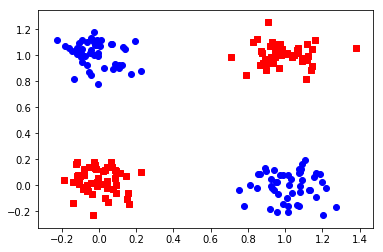

In [45]:
#Q4
category0 = x_train[:,0:99]
category1 = x_train[:,100:200]
f2 = plt.figure(2)     
plt.scatter(category0[0,:], category0[1,:], marker = 's', color = 'r')   
plt.scatter(category1[0,:], category1[1,:], marker = 'o', color = 'b')  

In [46]:
# No, the data is not linearly seperable. 
# Yes the neural networks in part 2 and 3 were able to correctly classify the data. That's the beauty of neural networks.
# They combine training points by giving apprpriate weight to the features. Thus on reaching optimal value of weights for these features 
# data can be classified correctly. Backpropogation also helps in this case to adjust the weights and give better accuracy. 